In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
games= pd.read_csv("games.csv")

In [3]:
games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,31260,boardgame,Agricola,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,124742,boardgame,Android: Netrunner,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,96848,boardgame,Mage Knight Board Game,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,84876,boardgame,The Castles of Burgundy,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [5]:
#checking for any null value
games.isnull().values.any()

True

In [6]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


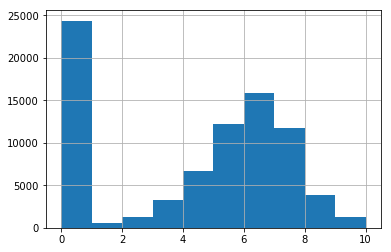

In [7]:
games['average_rating'].hist()


In [ ]:
# A lot of ratings are 0 

In [12]:
games[games['average_rating']==0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [ ]:
# Ignore all the 0 average rarings

In [15]:
games=games[games['average_rating']>0]
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


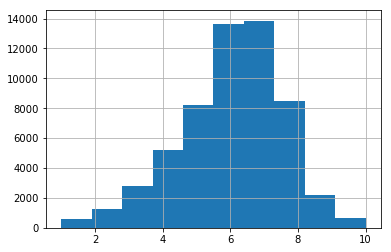

In [16]:
games['average_rating'].hist()

In [21]:
games=games.dropna(axis=0)

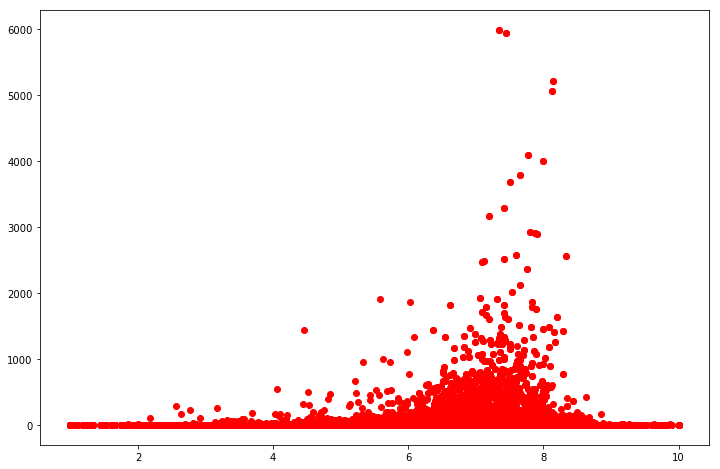

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(games['average_rating'],games['total_weights'],color='red')


In [ ]:
# Correlation plot using seaborn

In [25]:
import seaborn as sns
corrgames=games.corr()

In [26]:
corrgames

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.002767,-0.050234,0.006141,-0.022017,-0.026729,-0.022017,0.099168,-0.057778,0.304201,-0.117172,-0.040308,-0.112069,0.017463,0.024777,-0.089659,-0.078830,-0.082301
yearpublished,0.002767,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,-0.050234,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.006141,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,-0.026729,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.099168,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,-0.057778,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.304201,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081


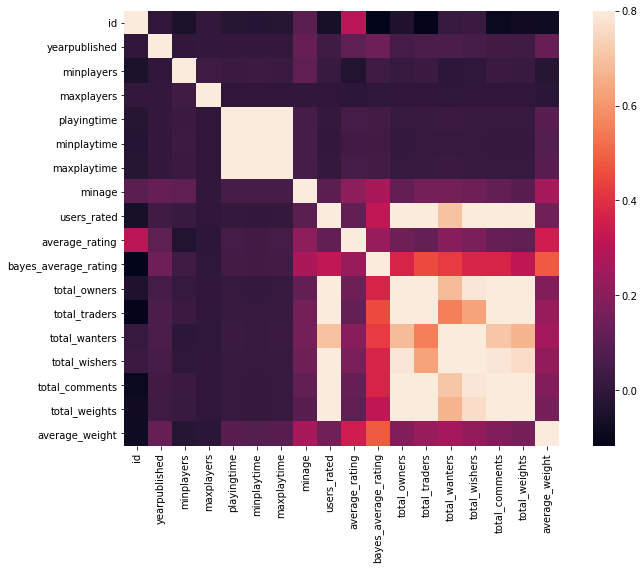

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(corrgames,vmax=0.8,square=True)

In [30]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [ ]:
# Remove nonuseful columns before putting this in an algorithm
1. id
2. bayes_average_rating
3. average_rating
4. type
5. Name


In [38]:
columnns= [c for c in games.columns if c not in ["id",'bayes_average_rating','average_rating','type','name']]

In [39]:
columnns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [42]:
X=games[columnns]
X.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,44362,795,861,5414,9173,5213,3.2943


In [44]:
y= games['average_rating']
y

0         8.33774
1         8.28798
2         8.28994
3         8.20407
4         8.14261
5         8.11957
6         8.16760
7         8.15901
8         8.07879
9         8.07933
10        7.98880
11        8.43944
12        8.35044
13        8.09283
14        7.99115
15        8.03071
16        7.98673
17        8.05776
18        7.87047
19        7.89829
20        7.98786
21        7.85479
22        7.89276
23        7.80281
24        7.93301
25        7.83279
26        7.97188
27        7.82181
28        7.82752
29        7.88473
           ...   
81134    10.00000
81160     8.00000
81162     5.00000
81176     8.20000
81177     8.20000
81178     7.80000
81179     7.91667
81180     7.91667
81181     8.00000
81184     8.00000
81188     8.00000
81190    10.00000
81192     8.00000
81193     7.50000
81195     8.00000
81198     9.00000
81199     8.00000
81204     8.10000
81234     7.00000
81249     5.00000
81254     7.50000
81255     7.75000
81256     8.00000
81257     8.00000
81258     

In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression 

In [47]:
reg=LinearRegression()

In [48]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
pred=reg.predict(X_test)
pred

array([ 6.17838717,  6.34700158,  6.2981127 , ...,  5.25293709,
        7.05518898,  6.73499663])

In [57]:
## Calculate mean abs error
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(y_test,pred)

1.0793152875131662

In [61]:
#calculate mean squared error
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test,pred)

2.0805075052886335

In [66]:
#accuracy

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2_score(y_test,pred)

0.15877268941884748

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [52]:
predictions= regressor.predict(X_test)


In [56]:
predictions

array([ 5.60769,  3.9    ,  5.70357, ...,  6.4    ,  7.425  ,  6.74552])

In [60]:
mean_absolute_error(y_test,predictions)

1.175671663896003

In [65]:
mean_squared_error(y_test,predictions)

2.8865122024116761

In [69]:
r2_score(y_test,predictions)

-0.16712527631933849